In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as splt

In [40]:
df = pd.read_csv("nueocv.csv")
df.head()

,Pais,Año,Indicador,Valor,Indicador_name
0,AUS,1987,FP.CPI.TOTL.ZG,8.533022,"Inflation, consumer prices (annual %)"
1,AUS,1988,FP.CPI.TOTL.ZG,7.215940,"Inflation, consumer prices (annual %)"
2,AUS,1989,FP.CPI.TOTL.ZG,7.533903,"Inflation, consumer prices (annual %)"
3,AUS,1990,FP.CPI.TOTL.ZG,7.333022,"Inflation, consumer prices (annual %)"
4,AUS,1991,FP.CPI.TOTL.ZG,3.176675,"Inflation, consumer prices (annual %)"


In [41]:
df_pivot = pd.pivot_table(data=df, index=['Pais', "Año"], columns='Indicador_name', values='Valor')
df_pivot.reset_index(inplace=True)
df_pivot

Indicador_name,Pais,Año,GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)","Population ages 0-14, female",...,"Population ages 65 and above, male","Population ages 65 and above, total",Population growth (annual %),"Population, female","Population, male","Population, total",Rural population,Rural population growth (annual %),Urban population,Urban population growth (annual %)
0,AFG,1987,NaN,NaN,NaN,NaN,43.453000,36.7390,39.844000,2387348.0,...,111022.0,233845.0,-1.210190,5152650.0,5170108.0,10322758.0,8225793.0,-2.043746,2096965.0,2.128391
1,AFG,1988,NaN,NaN,NaN,NaN,46.569000,41.5720,43.958000,2406727.0,...,110633.0,233853.0,0.586318,5188060.0,5195399.0,10383460.0,8203141.0,-0.275758,2180319.0,3.898014
2,AFG,1989,NaN,NaN,NaN,NaN,47.610000,42.8910,45.158000,2479055.0,...,113325.0,240097.0,2.751877,5334609.0,5338559.0,10673168.0,8422410.0,2.637888,2250758.0,3.179585
3,AFG,1990,NaN,NaN,NaN,NaN,48.397000,43.7090,45.967000,2490400.0,...,113182.0,240267.0,0.202434,5346409.0,5348387.0,10694796.0,8429959.0,0.089590,2264837.0,0.623574
4,AFG,1991,NaN,NaN,NaN,NaN,49.144000,44.3530,46.663000,2510102.0,...,113494.0,241354.0,0.469880,5372208.0,5372959.0,10745167.0,8460100.0,0.356909,2285067.0,0.889255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,ZAF,2018,7048.508112,0.285736,3.745754,4.517165,68.740000,62.2030,65.674000,8077191.0,...,1151914.0,3356734.0,1.225530,29517286.0,27822349.0,57339635.0,19291920.0,-0.264285,38047715.0,1.989500
1580,ZAF,2019,6688.774746,-0.987175,4.638081,4.120246,69.107000,62.8340,66.175000,8200552.0,...,1183770.0,3456202.0,1.295074,29879107.0,28207948.0,58087055.0,19252374.0,-0.205198,38834681.0,2.047266
1581,ZAF,2020,5741.641249,-7.481093,5.692615,3.210036,67.964000,62.1780,65.252000,8299706.0,...,1203270.0,3528430.0,1.223179,30221143.0,28580784.0,58801927.0,19196477.0,-0.290761,39605450.0,1.965305
1582,ZAF,2021,7055.055176,3.870315,6.219017,4.611672,64.999000,59.4580,62.341000,8363479.0,...,1200226.0,3546983.0,0.998920,30497646.0,28894608.0,59392255.0,19096392.0,-0.522736,40295863.0,1.728207


In [42]:
df_pivot.to_csv("indicdores.csv", index=False)

In [43]:
df_pivot.dtypes

Indicador_name
Pais                                         object
Año                                           int64
GDP per capita (current US$)                float64
GDP per capita growth (annual %)            float64
Inflation, GDP deflator (annual %)          float64
Inflation, consumer prices (annual %)       float64
Life expectancy at birth, female (years)    float64
Life expectancy at birth, male (years)      float64
Life expectancy at birth, total (years)     float64
Population ages 0-14, female                float64
Population ages 0-14, male                  float64
Population ages 0-14, total                 float64
Population ages 15-64, female               float64
Population ages 15-64, male                 float64
Population ages 15-64, total                float64
Population ages 65 and above, female        float64
Population ages 65 and above, male          float64
Population ages 65 and above, total         float64
Population growth (annual %)                float

In [44]:
df_pivot.columns

Index(['Pais', 'Año', 'GDP per capita (current US$)',
       'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Life expectancy at birth, total (years)',
       'Population ages 0-14, female', 'Population ages 0-14, male',
       'Population ages 0-14, total', 'Population ages 15-64, female',
       'Population ages 15-64, male', 'Population ages 15-64, total',
       'Population ages 65 and above, female',
       'Population ages 65 and above, male',
       'Population ages 65 and above, total', 'Population growth (annual %)',
       'Population, female', 'Population, male', 'Population, total',
       'Rural population', 'Rural population growth (annual %)',
       'Urban population', 'Urban population growth (annual %)'],
      dtype='object', name='Indicador_name')

In [45]:
df_pivot["ratio_population ages 65 and above"] = df_pivot["Population ages 65 and above, total"]/df_pivot["Population, total"]
df_pivot["ratio_urban population"] = df_pivot["Urban population"]/df_pivot["Population, total"]

In [46]:
columnas_seleccionadas = ["Pais","Año","GDP per capita (current US$)","Inflation, GDP deflator (annual %)", "Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Population growth (annual %)","ratio_population ages 65 and above","ratio_urban population", "Urban population growth (annual %)"]

In [47]:
df_pivot = df_pivot[columnas_seleccionadas]

In [48]:
df_pivot_años = df_pivot[df_pivot["Año"].isin([2017,2018,2019,2020,2021])]
df_pivot_años.reset_index(drop=True, inplace=True)
df_pivot_años

Indicador_name,Pais,Año,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,AFG,2017,NaN,NaN,NaN,63.016,2.866492,0.023998,0.25250,3.781557
1,AFG,2018,NaN,NaN,NaN,63.081,2.885208,0.024071,0.25495,3.850833
2,AFG,2019,NaN,NaN,NaN,63.565,2.908529,0.024178,0.25754,3.919287
3,AFG,2020,NaN,NaN,NaN,62.575,3.134747,0.024170,0.26026,4.185357
4,AFG,2021,NaN,NaN,NaN,61.982,2.851358,0.024041,0.26314,3.951857
...,...,...,...,...,...,...,...,...,...,...
215,ZAF,2017,6734.475153,5.473322,5.184247,65.402,0.387278,0.057373,0.65850,1.163250
216,ZAF,2018,7048.508112,3.745754,4.517165,65.674,1.225530,0.058541,0.66355,1.989500
217,ZAF,2019,6688.774746,4.638081,4.120246,66.175,1.295074,0.059500,0.66856,2.047266
218,ZAF,2020,5741.641249,5.692615,3.210036,65.252,1.223179,0.060005,0.67354,1.965305


In [49]:
df_pivot_años.fillna(0, inplace=True)
df_pivot_años

C:\Users\ldmendozac\AppData\Local\Temp\ipykernel_3796\3946676365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_años.fillna(0, inplace=True)


Indicador_name,Pais,Año,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,AFG,2017,0.000000,0.000000,0.000000,63.016,2.866492,0.023998,0.25250,3.781557
1,AFG,2018,0.000000,0.000000,0.000000,63.081,2.885208,0.024071,0.25495,3.850833
2,AFG,2019,0.000000,0.000000,0.000000,63.565,2.908529,0.024178,0.25754,3.919287
3,AFG,2020,0.000000,0.000000,0.000000,62.575,3.134747,0.024170,0.26026,4.185357
4,AFG,2021,0.000000,0.000000,0.000000,61.982,2.851358,0.024041,0.26314,3.951857
...,...,...,...,...,...,...,...,...,...,...
215,ZAF,2017,6734.475153,5.473322,5.184247,65.402,0.387278,0.057373,0.65850,1.163250
216,ZAF,2018,7048.508112,3.745754,4.517165,65.674,1.225530,0.058541,0.66355,1.989500
217,ZAF,2019,6688.774746,4.638081,4.120246,66.175,1.295074,0.059500,0.66856,2.047266
218,ZAF,2020,5741.641249,5.692615,3.210036,65.252,1.223179,0.060005,0.67354,1.965305


In [50]:
df_pivot_años_group = df_pivot_años.groupby("Pais").mean().drop(columns=['Año'])
df_pivot_años_group.reset_index(inplace=True)
df_pivot_años_group

Indicador_name,Pais,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,AFG,0.000000,0.000000,0.000000,62.843800,2.929267,0.024091,0.257678,3.937778
1,ARE,43421.427078,2.395615,0.000000,79.302600,0.808158,0.014222,0.867812,1.116134
2,ARG,11100.883304,42.292984,0.000000,76.479600,0.992777,0.115880,0.919900,1.123750
3,AUS,55649.756424,2.702153,1.836326,82.929756,1.201004,0.159644,0.861286,1.331580
4,AUT,50282.610191,1.778456,1.951824,81.532683,0.495443,0.189736,0.585298,0.868419
5,BFA,797.775144,2.025153,1.148705,59.724600,2.735475,0.025614,0.299856,4.829883
6,BRA,8496.709453,6.049149,4.471526,74.406600,0.709181,0.090002,0.868184,1.003374
7,CAN,46751.935346,2.903484,1.985314,82.034541,1.139466,0.176072,0.814916,1.226117
8,CHE,85848.174807,0.122247,0.337790,83.612195,0.773234,0.185573,0.738636,0.842819
9,CHN,10378.507186,2.812982,1.993520,77.849600,0.350990,0.120393,0.602720,2.289982


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

columnas = df_pivot_años_group.columns[1:]

df_pivot_años_group_escaler = scaler.fit_transform(df_pivot_años_group[columnas])

df_pivot_años_group_escaler = pd.DataFrame(df_pivot_años_group_escaler, columns=df_pivot_años_group.columns[1:])

df_pivot_años_group_escaler

Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,-0.937805,-0.466798,-0.981417,-1.506843,1.837343,-1.194228,-1.546286,1.699637
1,0.807033,-0.300037,-0.981417,0.608718,-0.208382,-1.332633,0.848561,-0.323316
2,-0.491729,2.477266,-0.981417,0.245859,-0.030324,0.092970,1.053012,-0.317856
3,1.298414,-0.278698,-0.160403,1.074942,0.170503,0.706689,0.822945,-0.168854
4,1.082742,-0.342998,-0.108765,0.895366,-0.509983,1.128686,-0.260339,-0.500913
5,-0.905747,-0.325825,-0.467836,-1.907775,1.650439,-1.172877,-1.380732,2.339224
6,-0.596375,-0.045710,1.017783,-0.020598,-0.303841,-0.269934,0.850021,-0.404159
7,0.940866,-0.264683,-0.093792,0.959873,0.111152,0.937071,0.640938,-0.244465
8,2.511902,-0.458289,-0.830393,1.162660,-0.242065,1.070296,0.341530,-0.519267
9,-0.520757,-0.270983,-0.090123,0.421954,-0.649302,0.156255,-0.191956,0.518264


In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [54]:
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [55]:
kmeans.fit(df_pivot_años_group_escaler)

cluster_labels = kmeans.labels_

df_pivot_años_group_escaler_cluster = df_pivot_años_group_escaler.assign(Cluster=cluster_labels)

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
df_pivot_años_group_escaler_cluster

Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,-0.937805,-0.466798,-0.981417,-1.506843,1.837343,-1.194228,-1.546286,1.699637,4
1,0.807033,-0.300037,-0.981417,0.608718,-0.208382,-1.332633,0.848561,-0.323316,0
2,-0.491729,2.477266,-0.981417,0.245859,-0.030324,0.092970,1.053012,-0.317856,3
3,1.298414,-0.278698,-0.160403,1.074942,0.170503,0.706689,0.822945,-0.168854,2
4,1.082742,-0.342998,-0.108765,0.895366,-0.509983,1.128686,-0.260339,-0.500913,2
5,-0.905747,-0.325825,-0.467836,-1.907775,1.650439,-1.172877,-1.380732,2.339224,4
6,-0.596375,-0.045710,1.017783,-0.020598,-0.303841,-0.269934,0.850021,-0.404159,0
7,0.940866,-0.264683,-0.093792,0.959873,0.111152,0.937071,0.640938,-0.244465,2
8,2.511902,-0.458289,-0.830393,1.162660,-0.242065,1.070296,0.341530,-0.519267,2
9,-0.520757,-0.270983,-0.090123,0.421954,-0.649302,0.156255,-0.191956,0.518264,0


In [57]:
df_pivot_años_group_escaler_cluster

Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,-0.937805,-0.466798,-0.981417,-1.506843,1.837343,-1.194228,-1.546286,1.699637,4
1,0.807033,-0.300037,-0.981417,0.608718,-0.208382,-1.332633,0.848561,-0.323316,0
2,-0.491729,2.477266,-0.981417,0.245859,-0.030324,0.092970,1.053012,-0.317856,3
3,1.298414,-0.278698,-0.160403,1.074942,0.170503,0.706689,0.822945,-0.168854,2
4,1.082742,-0.342998,-0.108765,0.895366,-0.509983,1.128686,-0.260339,-0.500913,2
5,-0.905747,-0.325825,-0.467836,-1.907775,1.650439,-1.172877,-1.380732,2.339224,4
6,-0.596375,-0.045710,1.017783,-0.020598,-0.303841,-0.269934,0.850021,-0.404159,0
7,0.940866,-0.264683,-0.093792,0.959873,0.111152,0.937071,0.640938,-0.244465,2
8,2.511902,-0.458289,-0.830393,1.162660,-0.242065,1.070296,0.341530,-0.519267,2
9,-0.520757,-0.270983,-0.090123,0.421954,-0.649302,0.156255,-0.191956,0.518264,0


In [58]:
df_pivot_años_group_escaler_cluster = df_pivot_años_group_escaler_cluster.groupby("Cluster").mean()
df_pivot_años_group_escaler_cluster

Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
Cluster,,,,,,,,
0,-0.495509,-0.223776,0.118459,-0.056249,-0.068510,-0.510791,0.178527,-0.071450
1,-0.867406,-0.046289,1.579937,-0.821361,0.613507,-0.881269,-1.471325,0.966670
2,1.157854,-0.326719,-0.323960,0.956621,-0.528501,1.131550,0.704296,-0.635564
3,-0.599050,3.308991,-0.981417,0.047244,-1.272242,0.077389,0.809508,-1.272544
4,-0.917391,-0.257775,-0.602090,-1.946403,1.910170,-1.179655,-1.473737,1.837388


In [59]:
df_pivot_años_group_escaler_cluster

Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
Cluster,,,,,,,,
0,-0.495509,-0.223776,0.118459,-0.056249,-0.068510,-0.510791,0.178527,-0.071450
1,-0.867406,-0.046289,1.579937,-0.821361,0.613507,-0.881269,-1.471325,0.966670
2,1.157854,-0.326719,-0.323960,0.956621,-0.528501,1.131550,0.704296,-0.635564
3,-0.599050,3.308991,-0.981417,0.047244,-1.272242,0.077389,0.809508,-1.272544
4,-0.917391,-0.257775,-0.602090,-1.946403,1.910170,-1.179655,-1.473737,1.837388


In [60]:
df_pivot_años_group_cluster = df_pivot_años_group.assign(Cluster=cluster_labels)
df_pivot_años_group_cluster

Indicador_name,Pais,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,AFG,0.000000,0.000000,0.000000,62.843800,2.929267,0.024091,0.257678,3.937778,4
1,ARE,43421.427078,2.395615,0.000000,79.302600,0.808158,0.014222,0.867812,1.116134,0
2,ARG,11100.883304,42.292984,0.000000,76.479600,0.992777,0.115880,0.919900,1.123750,3
3,AUS,55649.756424,2.702153,1.836326,82.929756,1.201004,0.159644,0.861286,1.331580,2
4,AUT,50282.610191,1.778456,1.951824,81.532683,0.495443,0.189736,0.585298,0.868419,2
5,BFA,797.775144,2.025153,1.148705,59.724600,2.735475,0.025614,0.299856,4.829883,4
6,BRA,8496.709453,6.049149,4.471526,74.406600,0.709181,0.090002,0.868184,1.003374,0
7,CAN,46751.935346,2.903484,1.985314,82.034541,1.139466,0.176072,0.814916,1.226117,2
8,CHE,85848.174807,0.122247,0.337790,83.612195,0.773234,0.185573,0.738636,0.842819,2
9,CHN,10378.507186,2.812982,1.993520,77.849600,0.350990,0.120393,0.602720,2.289982,0


In [61]:
df_pivot_años_group_cluster['Cluster'] = df_pivot_años_group_cluster['Cluster'].astype("str")

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster', ylabel='Life expectancy at birth, total (years)'>

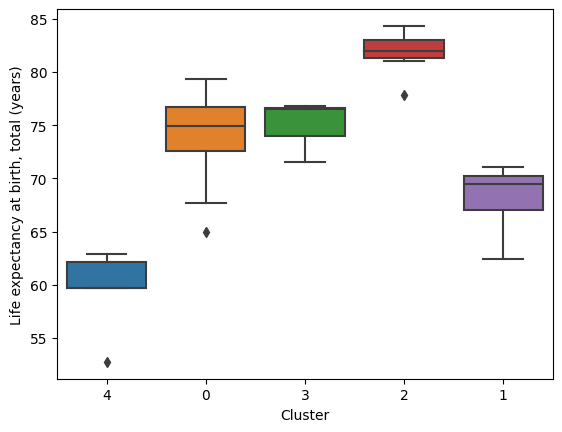

In [62]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'Life expectancy at birth, total (years)', x = 'Cluster')

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='Life expectancy at birth, total (years)', ylabel='Count'>

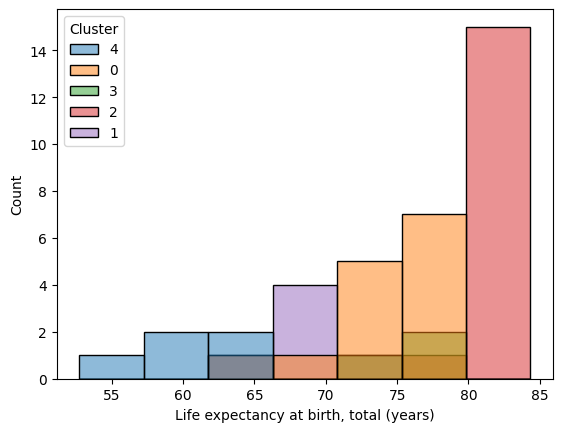

In [63]:
sns.histplot(data=df_pivot_años_group_cluster, x="Life expectancy at birth, total (years)", hue="Cluster")

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster', ylabel='GDP per capita (current US$)'>

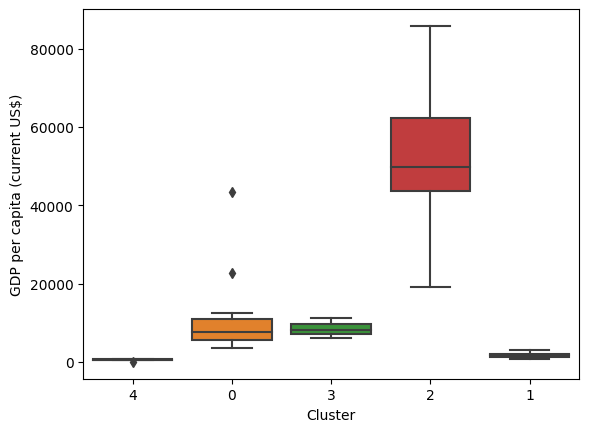

In [64]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'GDP per capita (current US$)', x = 'Cluster')

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='GDP per capita (current US$)', ylabel='Count'>

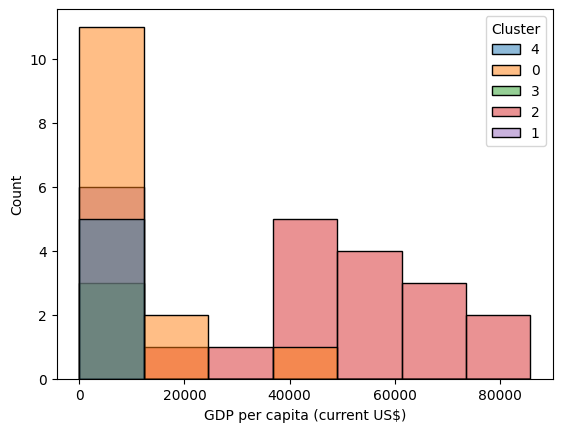

In [65]:
sns.histplot(data=df_pivot_años_group_cluster, x="GDP per capita (current US$)", hue="Cluster")

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster', ylabel='ratio_population ages 65 and above'>

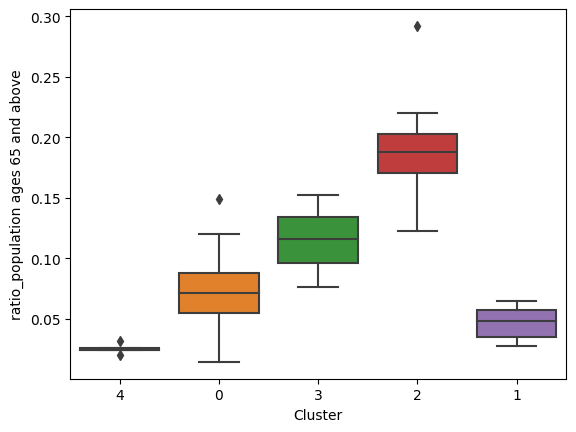

In [66]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'ratio_population ages 65 and above', x = 'Cluster')

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='ratio_population ages 65 and above', ylabel='Count'>

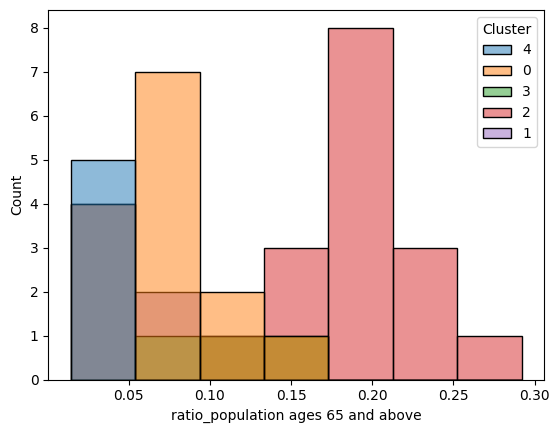

In [67]:
sns.histplot(data=df_pivot_años_group_cluster, x="ratio_population ages 65 and above", hue="Cluster")

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster', ylabel='ratio_urban population'>

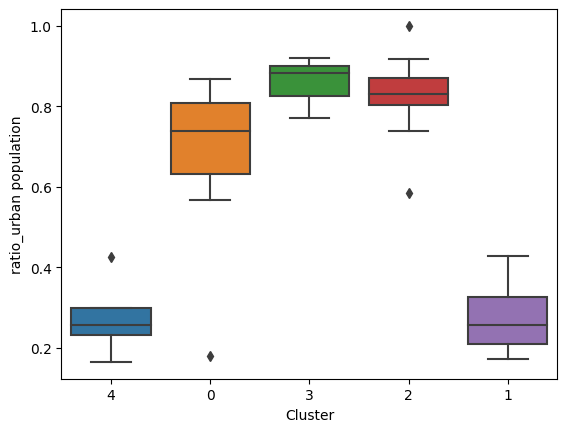

In [68]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'ratio_urban population', x = 'Cluster')

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='Life expectancy at birth, total (years)', ylabel='GDP per capita (current US$)'>

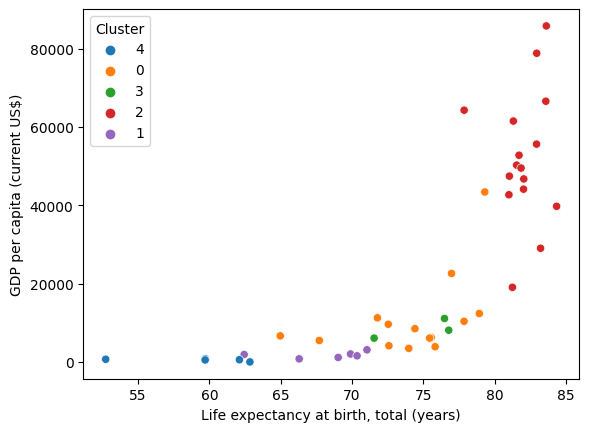

In [69]:
sns.scatterplot(data=df_pivot_años_group_cluster, x="Life expectancy at birth, total (years)", y="GDP per capita (current US$)", hue="Cluster")

In [70]:
df_pivot_años_group_cluster[df_pivot_años_group_cluster["Cluster"]=="2"]

Indicador_name,Pais,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
3,AUS,55649.756424,2.702153,1.836326,82.929756,1.201004,0.159644,0.861286,1.331580,2
4,AUT,50282.610191,1.778456,1.951824,81.532683,0.495443,0.189736,0.585298,0.868419,2
7,CAN,46751.935346,2.903484,1.985314,82.034541,1.139466,0.176072,0.814916,1.226117,2
8,CHE,85848.174807,0.122247,0.337790,83.612195,0.773234,0.185573,0.738636,0.842819,2
13,DEU,47472.386809,2.100805,1.579774,81.024098,0.204758,0.217348,0.773892,0.287463,2
14,DNK,61543.637762,1.671108,0.998526,81.302927,0.444475,0.197947,0.879962,0.580473,2
18,ESP,29041.950040,1.503733,1.420192,83.211220,0.396899,0.194839,0.805664,0.699212,2
19,FIN,49537.818444,1.622952,1.069412,81.842927,0.165687,0.220397,0.854532,0.240830,2
21,GBR,42716.078528,2.318430,2.019312,80.993659,0.426654,0.185270,0.836496,0.729824,2
22,GRC,19066.981558,0.155130,0.395145,81.237073,-0.251670,0.219122,0.793846,0.165198,2


<h2>Gráfico de codo</h2>

In [71]:
valores = []

for i in range(2,11):

  modelo_kmeans_numcluster = KMeans(n_clusters = i, random_state = 123)
  modelo_kmeans_numcluster.fit(df_pivot_años_group_escaler)
  valores.append(modelo_kmeans_numcluster.inertia_)

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-p

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

<Axes: >

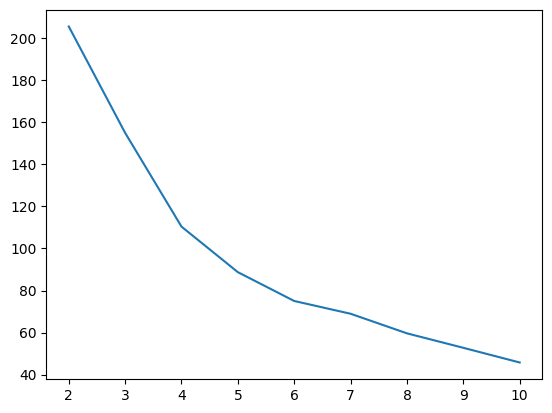

In [72]:
sns.lineplot(x = range(2,11), y = valores)

<h2>Coeficiente de silhoutte</h2>

In [73]:
from sklearn.metrics import silhouette_score, silhouette_samples

scores = []

for i in range(2,11):
  modelo_kmeans_numcluster = KMeans(n_clusters = i, random_state = 123)
  modelo_kmeans_numcluster.fit(df_pivot_años_group_escaler)
  etiquetas = modelo_kmeans_numcluster.labels_
  coef_silhouette = silhouette_score(df_pivot_años_group_escaler, etiquetas)
  scores.append(coef_silhouette)

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-p

c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ldmendozac\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

<Axes: >

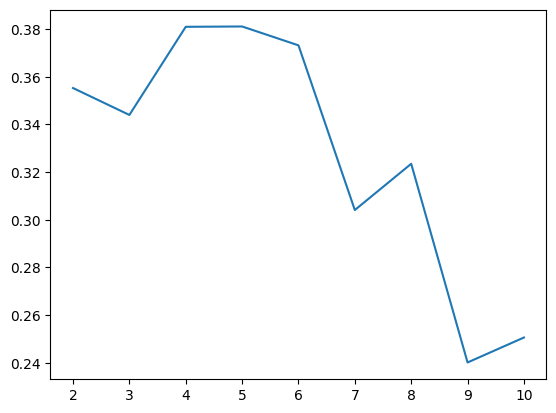

In [74]:
sns.lineplot(x = range(2,11), y = scores)

In [75]:
diccionario = df_pivot_años_group_cluster[['Pais','Cluster']].set_index('Pais')['Cluster'].to_dict()

diccionario

{'AFG': '4',
 'ARE': '0',
 'ARG': '3',
 'AUS': '2',
 'AUT': '2',
 'BFA': '4',
 'BRA': '0',
 'CAN': '2',
 'CHE': '2',
 'CHN': '0',
 'COL': '0',
 'CRI': '0',
 'CUB': '3',
 'DEU': '2',
 'DNK': '2',
 'DZA': '0',
 'ECU': '0',
 'EGY': '1',
 'ESP': '2',
 'FIN': '2',
 'FJI': '0',
 'GBR': '2',
 'GRC': '2',
 'IND': '1',
 'JPN': '2',
 'KEN': '1',
 'KHM': '1',
 'MAR': '0',
 'MEX': '0',
 'NER': '4',
 'NLD': '2',
 'NOR': '2',
 'NPL': '1',
 'NZL': '2',
 'RUS': '0',
 'RWA': '1',
 'SAU': '0',
 'SGP': '2',
 'SLE': '4',
 'TCD': '4',
 'USA': '2',
 'VEN': '3',
 'WSM': '0',
 'ZAF': '0'}

In [76]:
df_pivot_años['Cluster'] = df_pivot_años['Pais'].map(diccionario)

C:\Users\ldmendozac\AppData\Local\Temp\ipykernel_3796\2060666620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_años['Cluster'] = df_pivot_años['Pais'].map(diccionario)
